# load library

In [1]:

source("r/jupyter_common.R")
source("r/identify_cell_types.R")
source("r/plot_sc_clusters.R")



In [2]:
# data structure
suppressPackageStartupMessages(library(data.table))

# single cell analysis
suppressPackageStartupMessages(library(Seurat))
suppressPackageStartupMessages(library(ArchR))



## parallel

In [3]:
suppressPackageStartupMessages(library(parallel))
suppressPackageStartupMessages(library(future))
plan("multicore", workers = 8)

options(future.globals.maxSize = 5 * 1024^3) # 5GB


# parameters

In [4]:
str_condition <- "male-bc"

figure_format <- "pdf"


## set.seed

In [5]:
# set seed for reproducibility
set.seed(51)



## display

In [6]:
options(repr.matrix.max.cols=150, repr.matrix.max.rows=50)



# read scATAC-seq

In [7]:
dir_atac <- "/home/hkim77/francolab.w/sc-atac-seq/male-bc/run-20220725"
fname_atac <- sprintf("%s/output_male-bc/rds/male-bc_archrproj_obj_final.rds", dir_atac)

atac <- readRDS(fname_atac)


# peak call summary

## piedonut

In [8]:
suppressPackageStartupMessages(library(moonBook))
suppressPackageStartupMessages(library(webr))
source("r/webr/PieDonut.R")


In [9]:
peakDF <- metadata(atac@peakSet)$PeakCallSummary
peakDF <- peakDF %>% group_by(Group) %>% mutate(percent = 100*(Freq / sum(Freq)))
f <- grepl("UnionPeaks", peakDF$Group)
peakDF[f,]


Group,Var1,Freq,percent
<chr>,<fct>,<dbl>,<dbl>
UnionPeaks,Distal,31.292,31.333674
UnionPeaks,Exonic,8.482,8.493296
UnionPeaks,Intronic,46.118,46.179419
UnionPeaks,Promoter,13.975,13.993612


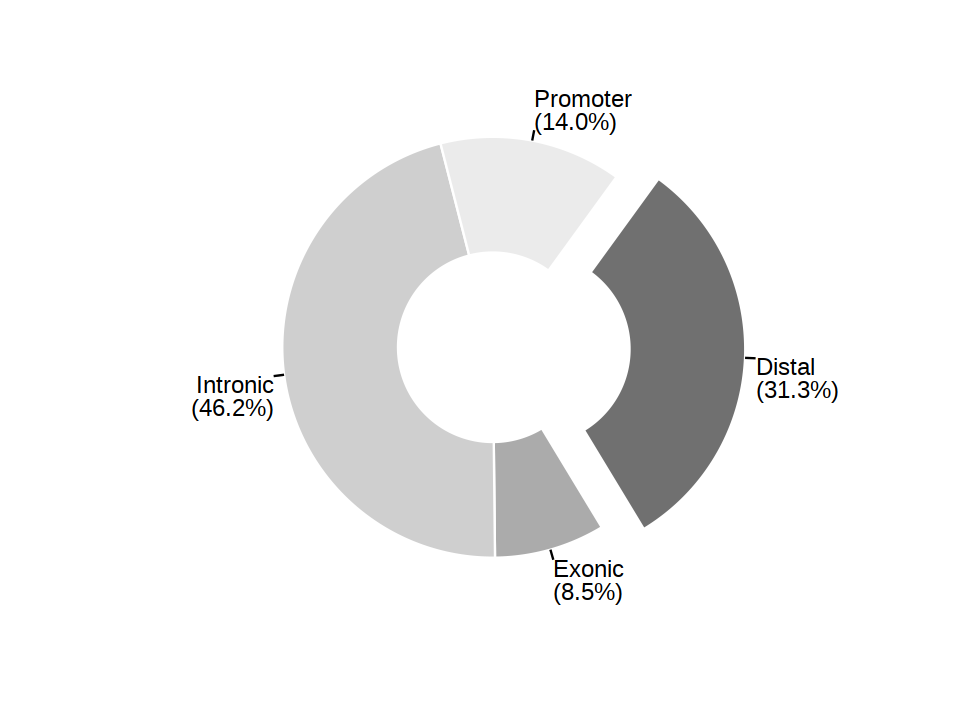

In [10]:
gg <- PieDonut(peakDF[f,], aes(Var1, count=Freq),
              r0=0.45, start=4.4*pi/2, labelpositionThreshold=1,
              explode = 1, explodePos=0.2,
              showPieName = TRUE, showDonutName = FALSE, title = NULL,
              pieLabelSize = 5, donutLabelSize = 5, titlesize = 3,
              mainCol = gray.colors(nrow(peakDF[f,])), 
              pieName="")

filename <- "piedonut_peak_call_summary"
print_figure(gg, width=8, height=6, file=filename)


# reference

https://jianhong.github.io/workshop2020/articles/ChIPpeakAnno.html

